# Lab 1

## Introduction to Pytorch

In [ ]:
import torch

In [ ]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

1. = float

In [ ]:
# Vector
t2 = torch.tensor([1.,2,3,4])
t2[1]

tensor(2.)

In [ ]:
# Matrix
t3 = torch.tensor([
])

t4.shape = size or length of matrix (as in numpy)

In [ ]:
# Create tensors
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

Line parameters
(Min error function)

Gradient descent (not in matlab or numpy)

In [ ]:
# Arithmetic Operations
y = w*x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
# Compute derivatives
y.backward()

In [ ]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [ ]:
# Arithmetic Operations
#y1 = w*w*x + b
w1 = torch.tensor(2., requires_grad=True)
y1 = w1*y
y1

tensor(34., grad_fn=<MulBackward0>)

In [ ]:
w2 = torch.tensor(2., requires_grad=True)
y2 = w2*y1
y2

tensor(68., grad_fn=<MulBackward0>)

In [ ]:
# Compute derivatives
y2.backward()

In [ ]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)
print('dy/dw:', w1.grad)
print('dy/dw:', w2.grad)

dy/dx: None
dy/dw: tensor(12.)
dy/db: tensor(4.)
dy/dw: tensor(34.)
dy/dw: tensor(34.)


# Lab 2

## Activations

B = 1/(1+e^-a)

In [ ]:
alpha = torch.tensor(4., requires_grad=True)
beta = 1/(1+torch.exp(-1*alpha))
beta

tensor(0.9820, grad_fn=<MulBackward0>)

In [ ]:
# Compute derivatives
beta.backward()

dB/da

B(1-B)

In [ ]:
# Display gradients
print('da/dB:', alpha.grad)
print('da/dB:', beta*(1-beta))

da/dB: tensor(0.0177)
da/dB: tensor(0.0177, grad_fn=<MulBackward0>)


Text(0.5, 1.0, 'Output of sin(1/x)')

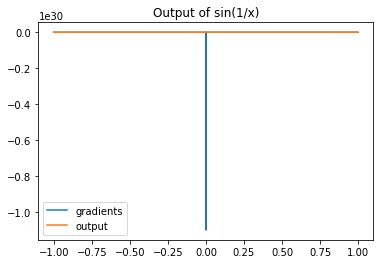

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

inputs = []
activations = []
gradients = []

for input in np.arange(-1,1,0.001):
  inputs.append(input)
  input = torch.tensor(input, requires_grad=True)
  activation = torch.sin(1/input)
  activation.backward()
  gradients.append(input.grad)
  activations.append(activation.detach())

plt.plot(inputs, gradients, label='gradients')
plt.plot(inputs, activations, label='output')
plt.legend()
plt.title('Output of sin(1/x)')

In [ ]:
x = np.array([[1, 2],[3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

In [ ]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

## Linear Regression

In [ ]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')
targets = np.array ([[56, 70],
                     [81, 101],
                     [119,133],
                     [22, 37],
                     [103, 119]], dtype='float32')

In [ ]:
# Convert inputs and targets into tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-0.3500,  0.4287, -0.8399],
        [-1.1520, -0.1311,  0.3817]], requires_grad=True)
tensor([-1.1392,  0.6091], requires_grad=True)


y = T0 + T1x1 + T2x2 + T3x3

or

X x W^T + b

In [ ]:
def model(x):
  return x @ w.t() + b

In [ ]:
regu = torch.sum(w*w,0)
regu

tensor([1.4496, 0.2010, 0.8511], grad_fn=<SumBackward1>)

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -34.0825,  -75.8564],
        [ -49.0176,  -91.3292],
        [ -22.8561,  -95.0425],
        [ -49.4843, -108.4081],
        [ -42.9259,  -64.7438]], grad_fn=<AddBackward0>)


In [ ]:
# MSE loss
def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff*diff)/diff.numel()

numel = divide by 10

In [ ]:
# Mean Squared Error
loss = mse(targets, preds)
print(loss)

tensor(23672.0273, grad_fn=<DivBackward0>)


In [ ]:
loss.backward()

In [ ]:
print('dE/dw:', w.grad)
print('dE/db:', b.grad)

dE/dw: tensor([[ -9621.8789, -10713.7012,  -6656.4126],
        [-15099.8242, -16229.4004, -10009.9053]])
dE/db: tensor([-115.8733, -179.0760])


In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

# Update rule, not an equation

In [ ]:
# Empty previous variables
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

In [ ]:
# Train for 100 epochs
for i in range (100):
  preds = model(inputs)
  loss = mse(targets, preds)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
loss

tensor(0.5170, grad_fn=<DivBackward0>)

For classification, change loss funstion.

In AlexNet we do 2D convolution.

## Neural network

Class with constructor and member function needed

# Lab 3

vscode

conda create -n

In [ ]:
class hospital():
  # instance
  def _init_(self, num_doctors, num_patients):

    self.num_doctors = num_doctors
    self.num_patients = num_patients
    # attributes

  def patients_per_doc(self):
    return int(self.num_patients / self.num_doctors)

In [ ]:
# object
obj1 = hospital(10, 100)

TypeError: ignored

In [ ]:
obj1.patients_per_doc()

NameError: ignored

In [ ]:
# inheritance
class KFC_sales(hospital):
  def _init_(self):
    super()._init_(10,100)
    self.buckets_sold = 0
    self.zingers_sold = 0

  def update_sales(self):
    self.buckets_sold = 0.5*num_doctors

In [ ]:
obj2.buckets_sold

AttributeError: ignored

In [ ]:
obj2.update_sales()

NameError: ignored

In [ ]:
import torch
from torch.utils.data import Dataset, Dataloader
from torchvision import transforms

ImportError: ignored

In [ ]:
class MyDataset():
  # saves path
  def _init_(self, dataset_path, transform = None):
    self.transform = transform

  # list of paths
  def _len_(self):
    pass

  # index range from len
  def _getitem_(self, index):
    pass


jpeg -> 3 channel

png -> 4 channel

# Lab 4

Dataset class defined as custom.

It has three main functions.
*   constructor *def _init_ ()*
*   argument *csv file*
*   *self* transform
*   class path

TOTENSOR *converts pil image to numpy array or tensor*

self *shares class's memory*

In [ ]:
# list
5*[2]

[2, 2, 2, 2, 2]

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### model.ipynb

torchvision.dataset.FashionMNIST

tensor vs. multi dimensional array : math different

In [ ]:
a = next(iter(train_set))
a[0].size